Installing libraries

In [1]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_df = pd.read_csv(r"../../data/processed/TCGA_GBM_LGG_Mutations_clean.csv") #change path when testing
X=data_df.drop(["Grade","Tumor_Type","IDH1", "TP53", "ATRX"], axis=1)
y=data_df["Grade"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
mlflow.set_experiment("Tumor_Classification")

Traceback (most recent call last):
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\store\tracking\file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\store\tracking\file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\store\tracking\file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\store\tracking\file_store.py", line 1360, in _read_helper
    result = read_yaml(root, file_name)
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\mlflow\utils\file_utils.py", line 309, in read_

<Experiment: artifact_location='file:///c:/Users/Usuario/Desktop/Maestria/4.-Trimestre/MNA/MLops-Equipo/notebooks/4.-MLFlow/mlruns/236535041957126280', creation_time=1729450834963, experiment_id='236535041957126280', last_update_time=1729450834963, lifecycle_stage='active', name='Tumor_Classification', tags={}>

In [6]:
def train_and_log_model(model, model_name, X_train, X_test, y_train, y_test, params):
    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        # Log parameters and metrics
        mlflow.log_params(params)
        mlflow.log_metrics({"accuracy": acc, "precision": prec, "recall": rec})
        # Log the model
        mlflow.sklearn.log_model(model, artifact_path="models")

Logistic Regression

In [7]:
params_lr = {"C": 1.0, "solver": "liblinear", "random_state": 42}
model_lr = LogisticRegression(**params_lr)

In [8]:
train_and_log_model(
    model=model_lr,
    model_name="Logistic_Regression",
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    params=params_lr
)

2024/10/20 13:00:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


 Decision Tree Classifier

In [9]:
params_dt = {"max_depth": 5, "criterion": "entropy", "random_state": 42}
model_dt = DecisionTreeClassifier(**params_dt)

In [10]:
train_and_log_model(
    model=model_dt,
    model_name="Decision_Tree",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    params=params_dt
)

2024/10/20 13:00:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


c. Random Forest Classifier

In [11]:
params_rf = {"n_estimators": 100, "max_depth": 5, "random_state": 42}
model_rf = RandomForestClassifier(**params_rf)

In [12]:
train_and_log_model(
    model=model_rf,
    model_name="Random_Forest",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    params=params_rf
)

2024/10/20 13:00:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Compare Results

TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'ax'

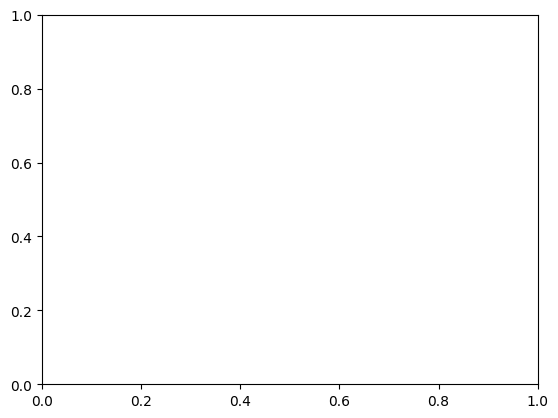

In [15]:
# Example of logging an artifact
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots()
ConfusionMatrixDisplay(model_lr, X_test_scaled, y_test, ax=ax)
plt.savefig("confusion_matrix.png")
mlflow.log_artifact("confusion_matrix.png")